---
title: "Writing Stable Diffusion from Scratch 8"
reading-time: 
date: "2023-3-28"
categories: [fastaipart2,Stable-Diffusion]
---

Things you will should know and practice after reading this : <br>
1- Getting data from dataloader of huggingface dataset <br>
2- @inplace in python <br>
3- plotting <br>


You need to install stuff in colab so the notebook works. I have some extra installation in compare to Jeremy original notebook. For more infor check this link in fastai forum:
https://forums.fast.ai/t/is-there-any-workaround-to-use-mini-ai-in-colab/104732

In [1]:
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 torchtext==0.14.1 fastai==2.7.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.8/232.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attemp

In [2]:
!pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.9 MB/s eta 0:00:00


In [3]:
!pip install torchdata==0.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: torchdata
    Found existing installation: torchdata 0.6.0
    Uninstalling torchdata-0.6.0:
      Successfully uninstalled torchdata-0.6.0


Let`s learn how to use huggingface datasets.

 So one thing that we're going to want to be able to do now that we've got a training loop is to grab data and there's a really fantastic library of datasets available on huggingface nowadays. And so let's look at how we use those datasets now that we know how to bring things into data loader and stuff, so that now we can use the entire world of huggingface datasets with our code.So you need to pip install datasets. And once you've pip install datasets, you have to say from datasets import and you can import a few things. Just these two things now like dataset like Dataset Builder, and we're going to look at a dataset called fashion MNIST. And so the way things tend to work with hacking faces is something called the Hugging Face Hub, which has models and it has datasets, amongst other things. And generally you'll give them a name and you can then say, in this case, load a dataset builder for fashion MNIST. Now a dataset builder is just basically something which has some metadata about about this dataset. So the dataset builder has a dot info and the dot info has a dot description. And here's a description of this. And as you can see again, we've got 28 by 28 to grayscale, so it's going to be very familiar to us because this is just like MNIST. And again, we've got ten categories and again we've got 60,000 training examples and again we've got 10,000 test examples. So this is this is code, as it says, direct drop in replacement for MNIST.

In [4]:
#| default_exp datasets

In [7]:
!pip install -Uqq git+https://github.com/fastai/course22p2


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.9 MB/s et

In [8]:
#|export
from __future__ import annotations
import math,numpy as np,matplotlib.pyplot as plt
from operator import itemgetter
from itertools import zip_longest
import fastcore.all as fc

from torch.utils.data import default_collate



In [9]:
import logging,pickle,gzip,os,time,shutil,torch,matplotlib as mpl
from pathlib import Path

from torch import tensor,nn,optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from datasets import load_dataset,load_dataset_builder

import torchvision.transforms.functional as TF
from fastcore.test import test_close

In [ ]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
torch.manual_seed(1)
mpl.rcParams['image.cmap'] = 'gray'

In [ ]:
logging.disable(logging.WARNING)

And so the dataset builder also will tell us what are what's in this dataset. And so huggingface stuff generally uses dictionaries rather than tuples. So there's going to be an image of type image and there's going to be a label of type class label. There's ten classes and these are the names of the classes. So it's quite nice that in huggingface datasets, you know, we can kind of get this information directly. It also tells us if there are some recommended training test splits, we can find out those as well. So this is the size of the training split and the number of examples. So now that we're ready to start playing it with that, we can load the dataset. Okay, so this is a different train load dataset builder versus load dataset. So this will actually download it, cache it, and here it is, and it creates a dataset dictionary. So a dataset dictionary, if you've used fastai is basically just like what we call the datasets class they call the dataset dict class. So it's a dictionary that contains, in this case, a train and a test item. And those are datasets. And these datasets are very much like the datasets that we created in the previous notebook. So we can now grab the training and test items from that dictionary and just pop them into variables. And so we can now have a look at the zero index thing in training. And just like we were promised, it contains an image and a label. So as you can see, we're not getting tuples anymore. We're getting dictionaries containing the x and the y in this case image and label. So I'm going to get pretty writing image and label and strings all the time, so I'm just going to store them as x and y. So x is going to be the string image and y will be the string label. I guess the other way I could have done that would have been to say x comma, y equals that probably a bit neater because it's coming straight from the features. And if you, if you iterate into a dictionary you get back its, its keys, that's why that works. So anyway, I've done it manually here, which is a bit sad, but there you go. Okay, so we can now grab the from train[0][x], which we've already seen. We can grab the x by the image and there it is. It's the image where you could grab the first five images in the first five labels, for example. And there they are. Now, we already know what the names of the classes are, so we could now see what these map two by grabbing those features. So there they are. So This is a special huggingface class, which most libraries have something including fast ai, that works like this. There's something called int to string, which is going to take these and convert them to these. So if I call it on our y batch, you'll see we've got first is ankle boots.

## Hugging Face Datasets

In [10]:
name = "fashion_mnist"
ds_builder = load_dataset_builder(name)
print(ds_builder.info.description)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of
60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,
associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in
replacement for the original MNIST dataset for benchmarking machine learning algorithms.
It shares the same image size and structure of training and testing splits.



In [11]:
ds_builder.info.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

In [12]:
ds_builder.info.splits

{'train': SplitInfo(name='train', num_bytes=31296655, num_examples=60000, shard_lengths=None, dataset_name=None),
 'test': SplitInfo(name='test', num_bytes=5233818, num_examples=10000, shard_lengths=None, dataset_name=None)}

In [13]:
dsd = load_dataset(name)
dsd

Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/0a671f063342996f19779d38c0ab4abef9c64f757b35af8134b331c294d7ba48. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [14]:
train,test = dsd['train'],dsd['test']
train[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7D5C52E6E0>,
 'label': 9}

In [15]:
x,y = ds_builder.info.features

In [16]:
x,y

('image', 'label')

In [17]:
x,y = 'image','label'
img = train[0][x]
img

That is indeed an ankle boot. They might have a couple of t shirts and a dress. Okay, so how do we use this to train a model? Well, we're going to need a data loader, and we want a data loader that for now we're going to just, like, return it before it's going to return. Well, actually, we're going to do something different. We're going to have our collate function is actually going to return a dictionary. Actually, this is pretty common for huggingface stuff. 

And PyTorch doesn't mind, it's happy for you to return a dictionary from a collation function. So rather than returning a tuple of the stacked up actually this looks very familiar. This looks a lot like the thing that goes through the dataset for each one and stacks them up just like we did in the previous notebook. So We're doing all all in one step here in our collate function. And then again, exactly the same thing. Go through our batch grab the y and this is just stacking them up with the integers so we don't have to call stack. And so we're now going to have the image and label bits in our dictionary. So if we create a data loader using that collation function, grab one batch so we can go a batch x.shape. It's a 16 by one by 28 by 28. And our y if a batch here, here it is. So the thing to notice here is that we haven't done any transforms or anything or written own dataset class or anything. We're actually putting all the work directly in the collation function. So this is like a really nice way to skip all the kind of abstractions of your framework if you want to is you can just do all of your work and collate functions so it's going to pass you each item. So it's going to you're going to get the batch directly and it's going to go through each item. And so here we're saying, okay, grab the x key from that dictionary, convert it to a tensor, and then do that for everything in the batch and then stack them all together. So this is yeah, this is like can be quite a nice way to do things if you want to do things just very manually without having to think too much about, you know, a framework, particularly if you're doing really custom stuff, this can be quite helpful. 



In [18]:
xb = train[:5][x]
yb = train[:5][y]
yb

[9, 0, 0, 3, 0]

In [19]:
featy = train.features[y]
featy

ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)

In [20]:
featy.int2str(yb)

['Ankle boot',
 'T - shirt / top',
 'T - shirt / top',
 'Dress',
 'T - shirt / top']

In [21]:
train['label'][:5]

[9, 0, 0, 3, 0]

In [22]:
def collate_fn(b):
    return {x:torch.stack([TF.to_tensor(o[x]) for o in b]),
            y:tensor([o[y] for o in b])}

In [23]:
dl = DataLoader(train, collate_fn=collate_fn, batch_size=16)
b = next(iter(dl))
b[x].shape,b[y]

(torch.Size([16, 1, 28, 28]),
 tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9]))

Having said that, huggingface data sets absolutely lets you avoid doing everything in collate function, which if we want to create really simple applications, that's where we're going to eventually went ahead. So we can do this using a transform instead. And so the way we do that is we create a function. It's going to take our batch, it's going to replace the x in our batch with the tensor version of each of those ???? images, and I'm not even stacking them or anything. And then we're going to return that batch. And so huggingface datasets has something called with_transform, and that's going to take your huggingface dataset. it's going to apply this function to every element and it doesn't run that all now. It's going to basically run when it behind the scenes, when it calls __getitem__, it will call this function on the fly. So in other words, this could have data augmentation, which can be random or whatever, because it's going to be rerun time. You grab an item, it's not cached or anything like that. So other than that, this data set has exactly the API, same API as any other data set.

 
It has a length it has a __getitem__ so you can pass it to a data loader. And so PyTorch already knows how to collate dictionaries of tensors. So we've got a dictionary of tensors now. So that means we don't need a collate function anymore. I can create a data loader from this without a collate function. As you can see. And so this is to give you the exactly the same thing as before about without having to create a custom collate function. Now, even this is a bit more code than I want having to return. This seems a bit silly, but the reason I had to do this is because huggingfaced datasets expects the with transform function to return to the the new version of the of the data. So I wanted to be able to write it like this transform in place and just say the change I want to make and have it automatically return that. So if I call, if I create this function, that's exactly the same as a previous one that doesn't have return.

 

In [24]:
def transforms(b):
    b[x] = [TF.to_tensor(o) for o in b[x]]
    return b

In [25]:
tds = train.with_transform(transforms)
dl = DataLoader(tds, batch_size=16)
b = next(iter(dl))
b[x].shape,b[y]

(torch.Size([16, 1, 28, 28]),
 tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9]))

In [26]:
def _transformi(b): b[x] = [torch.flatten(TF.to_tensor(o)) for o in b[x]]

How would I turn this into something which does return the result? So here's an interesting trick. 
 
 We could take that function, pass it to another function to create a new function, which is the a version of this in-place function that returns the result. And the way I do that is by creating a function called inplace. It takes a function, it returns a function. The function it returns is one that calls my original function and then returns the result. So this is the function. This is a function generating function, and it's modifying an in-place function to become function that returns that a new version of that data. And so this is a function this function is passed to this function which returns a function. And here it is. So here's the version that huggingface you'll be able to use so I can now pass that to with_transform. And it does exactly the same thing. So this is very, very common in Python. 

In [27]:
#|export
def inplace(f):
    def _f(b):
        f(b)
        return b
    return _f

In [28]:
transformi = inplace(_transformi)

In [29]:
r = train.with_transform(transformi)[0]
r[x].shape,r[y]

(torch.Size([784]), 9)

It's so common that line of code can be entirely removed and replaced with this little token. If you have a function and put that at the start, you can then put that before a function. And what it says is:

 take this whole function, pass it to this function and replace it with a result. So this is exactly the same as the combination of this and this.
 
And when we do it this way, this kind of little syntax, sugar is called a decorator. So there's nothing, nothing magic about decorators. It's literally, literally identical to this. Well, I guess the only difference is we don't end up with this unnecessary intermediate underscore version, but the result is exactly the same. And therefore, I can create a transformed dataset by using this. And there we go. It's all working fine. Yeah. So, I mean, none of this is particularly necessary, but what we're doing is we're just kind of like saying, you know, the pieces that we can make and put in place to make this stuff as easy as possible, and we don't have to think about things too much. All right, Now, with all this, we can basically make things pretty automatic. And the way we can make things pretty automatic is we're going to use a cool thing in Python code itemgetter.An itemgetter is a function that returns a function. So hopefully you're getting used to this idea. Now, this creates a function that gets the a , c items from a dictionary or something that looks like a dictionary. So here's a dictionary, it contains Keys, a, b, and c, So this function will take a dictionary and return the a and c values. And as you can see, it has done exactly that. Explain why this is useful in a moment. I just wanted to briefly mention what did I mean when I said something that looks like a dictionary? I mean, this is a dictionary. Okay, That looks like a dictionary, but it python doesn't care about what type things actually are. It only cares about what they look like. And remember that when we call something with square brackets, when we index into something behind the scenes, it's just call __getitem__ so we could create our own class and it's __getitem__ gets the key and it's just going to manually return one if k equals a, two if k is b or 3 otherwise. And look, that class also works just fine with an itemgetter. 
 
The reason this is interesting is because like a lot of people write Python as if it's like C++ or Java or something. They write as stiff as if it's this kind of statically thing. But I really wanted to point out that it's an extremely dynamic language and there's a lot more flexibility than you might have realized anyway. That's a little aside. So what we can do is think about a batch, for example, where we've got these two dictionaries. Okay, so PyTorch comes with a default collation function called not surprisingly, default_collate. So that's part of PyTorch. And what default_collate does with dictionaries is it simply takes the matching keys and then grabs their values and stacks them together. And so that's why if I called default_collate a is now one, three, b is now two four. That's actually what happened before when we created this data loader is that used default_collate function which does that. It also works on things that are tuples, not dictionaries, which is what most of you would have used before. 

In [30]:
@inplace
def transformi(b): b[x] = [torch.flatten(TF.to_tensor(o)) for o in b[x]]

In [31]:
tdsf = train.with_transform(transformi)
r = tdsf[0]
r[x].shape,r[y]

(torch.Size([784]), 9)

In [32]:
d = dict(a=1,b=2,c=3)
ig = itemgetter('a','c')
ig(d)

(1, 3)

In [33]:
class D:
    def __getitem__(self, k): return 1 if k=='a' else 2 if k=='b' else 3

In [34]:
d = D()
ig(d)

(1, 3)

In [35]:
list(tdsf.features)

['image', 'label']

In [36]:
batch = dict(a=[1],b=[2]), dict(a=[3],b=[4])
default_collate(batch)

{'a': [tensor([1, 3])], 'b': [tensor([2, 4])]}

And what we can do there for is we could create something called collate_dict, which is something which is going to take a dataset and it's going to create a itemgetter function for the features in that data set, which in this case is image and label. So this is a function which will get the image and label items. And so we're not going to return a function and that function is simply going to call our itemgetter on default_collate. And what this is going to do is it's going to take a dictionary and collate it into a tuple just like we did up here. So if we run that so we're not going to call data loader on our transform dataset passing in. And remember, this is a function that attends a function. So it's a collation function for this dataset and there it is. So now this looks a lot like what we had in our previous notebook. This is not returning a dictionary, that it's returning a tuple. So this is a really important idea for particularly for working with hugging face data sets is that they tend to do things with dictionaries and most things in the pytouch world tend to work with tuples. So you can just use this now to convert anything that takes that returns dictionaries into something that provides tuples by passing it as a collation function to your data letter. 

So remember, you know the thing you want to be doing this this week is, is doing things like import pdb, pdb.set.trace(), dataset,right, put breakpoints, step through, see what's happening, you know, not just here, but also even more importantly, doing it inside, the innermost inner function. So then you can see as I do wrong, that oh, today set underscore, trace. So then we can see exactly what's going on. Print out b, less the code and I could step into it and look, I'm now inside the default function, which is inside pytouch. And so I can now see exactly how that works. There it all is. So it's going to go through and this code is going to look very familiar because we've implemented all this ourselves, except it's being careful that it works for lots of different types of things. Dictionaries, numpy, arrays, so on and so forth. 

so the first thing I want to do, oh, actually something I do want to mention here. This is so useful. We want to be able to use it in all of our notebooks. So rather than copying and pasting this every time, it would be really nice to create a python module that contains this definition. So we've created a library called nbdev. It's really a whole system called nbdev, which does exactly that. It creates modules. You can use from your notebooks and the way you do it is you use this special thing we call comment directives, which is hash pipe export. So you put this at the top of a cell and it says do something special for this. So what this does is it says, put this into a python module for me, please export it to a python module. What python module is it going to put it in. Well, if you go all the way to the top, you tell it what default export module to create. So it's going to create a module called datasets. So what I do at the very end of this module is I've got this line that says import nbdev, nbdev.nbdev_export(). And what that's going to do for me is create a library, a Python library. I'm going to have a dataset.py in it and we'll see everything that we export it. Here it is collate_dict. It will appear this for me. And so what that means is now in the future, in my notebooks, I will be able to import collate_dict from that from my datasets. Now you might wonder how does it know to call it Mini AI? What's mini AI Well an nbdev, you create a setting start any file, right? You say what the name of your library is. So we're going to be using this quite a lot now because we're getting to the point where we're starting to implement stuff that didn't exist before. So previously most of this stuff was pretty much all the stuff we've created. I've said like, Oh, that already exists in PyTorch, so we don't need it, we just use pytorch. But we're now getting to a point where we're starting to create stuff that doesn't anywhere and we've created it ourselves and so therefore we want to be able to use it again. So during the rest of this course we're going to be building together a library called miniai. That's going to be our framework, our version of something like fastai, maybe it's something like what fastai 3 will end up being. Well, see, So that's what's going on here too. So we're going to be using once I start using miniai, I'll show you exactly how to install this. But that's what this export is. And so you might have noticed I also had an export on this inplace thing and I also had it on my necessary import statements. Okay. And we want to be able to see what this dataset looks like.



In [37]:
#|export
def collate_dict(ds):
    get = itemgetter(*ds.features)
    def _f(b): return get(default_collate(b))
    return _f

In [38]:
dlf = DataLoader(tdsf, batch_size=4, collate_fn=collate_dict(tdsf))
xb,yb = next(iter(dlf))
xb.shape,yb

(torch.Size([4, 784]), tensor([9, 0, 0, 3]))

## Plotting images

So I thought it now is a good time to talk a bit about plotting because how to visualize things well is really important. And again, the idea is we know we're not allowed to use fastai plotting library, so we got to learn how to do everything ourselves.

 So here's the basic way to plot such an image using matplotlib  so we can create a batch, grab the x part of it, grab the very first thing in that and imshow and it show an image. And here it is. There is our ankle boot. So let's start to think about what stuff we might create, which we can export to make this a bit easier. So let's create something called show_image, which basically does imshow, but we're going to do a few extra things. We will make sure that it's in the correct access order. We will make sure it's not uncleared character that's on the CPU here. If it's not a numpy array will convert it to a numpy array will be get a pass in an existing access, which we'll talk about soon. If we want to, we'll be able to set a title if we want to. And also this thing here removes all this ugly zero five blah blah, blah access because we're showing an image. We don't want any of that. So if we try that, you can see there you go. We've also been able to say what size we want. The image there at all is. Now here's something interesting. When I say help, the help shows the things that I implemented, but it also shows a whole lot more things. How did that magic thing happen? And you can see they work because his fixed size, which I didn't add all Oh, sorry, I did that. Well, okay, that's a bad example. Anyway, these other ones all work as well. So how did that happen? 
 
 Well, the trick is that I added **kwargs here:
 
And **kwargs says, You can pass as many any other arguments as you like that aren't listed and they'll all be put into a dictionary with this name and then when I call iamshow. I pass that entire dictionary. ** here means as separate arguments. And that's how come it works. And then how come doesn't know how come it knows what help to provide. The reason why is that fastcore has a special thing called delegate's, which is a decorator. So now you know what a decorator is and you tell it. What is it that you're going to be passing kwargs to? I'm going to be passing it to you, iamshow. And then it automatically creates the documentation correctly to show you what kwargs can do.



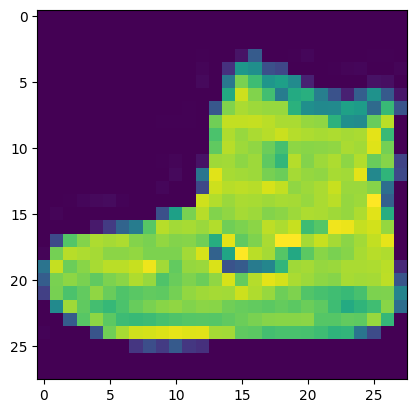

In [39]:
b = next(iter(dl))
xb = b['image']
img = xb[0]
plt.imshow(img[0]);

In [40]:
#|export
@fc.delegates(plt.Axes.imshow)
def show_image(im, ax=None, figsize=None, title=None, noframe=True, **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    if fc.hasattrs(im, ('cpu','permute','detach')):
        im = im.detach().cpu()
        if len(im.shape)==3 and im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): im=np.array(im)
    if im.shape[-1]==1: im=im[...,0]
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    if noframe: ax.axis('off')
    return ax

In [41]:
help(show_image)

Help on function show_image in module __main__:

show_image(im, ax=None, figsize=None, title=None, noframe=True, *, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None)
    Show a PIL or PyTorch image on `ax`.



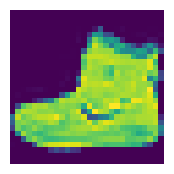

In [42]:
show_image(img, figsize=(2,2));

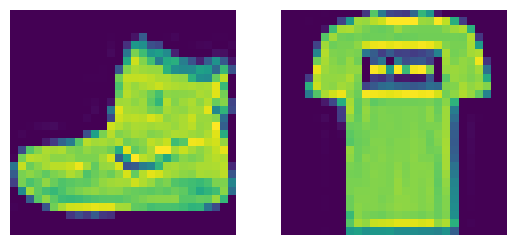

In [43]:
fig,axs = plt.subplots(1,2)
show_image(img, axs[0])
show_image(xb[1], axs[1]);

So this is a really helpful way of being able to kind of extend existing functions like iamshow and still get all of their functionality and all of their documentation and at your right. So delegates is one of the most useful things we have in fast core, in my opinion. So we're going to export that. So now we can use show image anytime you want, which is nice. Something that's really helpful to know about matplotlib is how to create subplots. So for example, what happens if you want to plot two images next to each other. So in matplotlib subplots creates multiple plots and you pass it number of rows and the number of columns. So this here has, as you see, one row and two columns and it returns axes. Now, what it calls axes is what it refers to as the individual plots. So if we now call show image on the first image passing in Axes zero, it's going to get that here. Right Then we call iamshow that means put the image on this subplot that I call it a subplot. Unfortunately, they call it an axis. Put it on this axis. So that's how come we're able to show an image, one image on the first axis and then show a second image on the second axis, by which we mean subplot. And there's are two images. So that's pretty handy. So I've decided to add some additional functionality to subplots. So therefore, I use delegates on subplots because I'm adding functionality to it and I'm going to be taking kwargs and passing it through to subplots. And the main thing I wanted to do is to automatically create an appropriate figure size by just finding out. You tell us what image size you want. And I also want to be able to add a title for the whole set of subplots. And so there it is. And then I also want to show you that in it automatically, if we want to create documentation for us as well for our library and here is the documentation. So as you can see here for the stuff I've added, it's telling me exactly what each of these parameters are, that type, the defaults and information about each one and that is automatically coming from these little comets, these we call these documents. This is all automatic stuff done by fast core and native. And so you might have noticed when you look at Fastai library documentation, it always has all this info. So that's that's that's why you don't actually have to show doc it automatically added to your documentation for you.

I'm just showing you here what it's going to end up looking like. And you can see that it's worked with delegates. It's put all the extra stuff from delegates in here as well, and they all stood out here as well. So anyway, subplots. So let's create a three by three set of plots and we'll grab the first images. And so now we can go through each of the subplots. Now it returns it as a three by three, basically a list of three lists of three items. So I flatten them all out into a single list. So I go through each of those subplots and go through each image and show each image on each axis. And so here's a quick way to quickly show them all. As you can see, it's a little bit ugly here, so we'll keep on adding more useful, plotting functionality. So here's something that again. It calls our subplots delegates to it, but we're going to be able to say, for example, how many subplots do we want? And it'll automatically calculate the rows in the columns and it's going to remove the axes for any ones that we're not actually using. And so here we got that. So that's what get grids going to let us do. So we're getting quite close. And so finally, why don't we just create a single thing called show images that's going to get our grid and it's going to go through our images optionally with lists of titles and show each one.

In [44]:
#|export
@fc.delegates(plt.subplots, keep=True)
def subplots(
    nrows:int=1, # Number of rows in returned axes grid
    ncols:int=1, # Number of columns in returned axes grid
    figsize:tuple=None, # Width, height in inches of the returned figure
    imsize:int=3, # Size (in inches) of images that will be displayed in the returned figure
    suptitle:str=None, # Title to be set to returned figure
    **kwargs
): # fig and axs
    "A figure and set of subplots to display images of `imsize` inches"
    if figsize is None: figsize=(ncols*imsize, nrows*imsize)
    fig,ax = plt.subplots(nrows, ncols, figsize=figsize, **kwargs)
    if suptitle is not None: fig.suptitle(suptitle)
    if nrows*ncols==1: ax = np.array([ax])
    return fig,ax

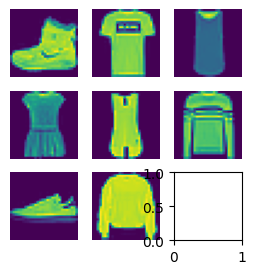

In [47]:
fig,axs = subplots(3,3, imsize=1)
imgs = xb[:8]
for ax,img in zip(axs.flat,imgs): show_image(img, ax)

 And we can use that here. You can see where you have successfully got all of our labeled images. And so we yeah, I think all this stuff for the plotting is pretty useful. So as you might have noticed, they were all exported. So in our datasets.py, we've got our get_grid, we've got our subplots, we've got our show_image. So that's going to make life easier for us now since we have to create everything from scratch. We have created all of those things. So as I mentioned at the very end, we have this one line of code to run. And so just to show you, if I remove miniai data sets,it's all empty. And then I run this line of code and now it's back, as you can see, and it tells you it's auto generated. All right, So we are nearly at the point where we can build our learner. And once we've built learner, we're going to be able to really dive deep into training and studying models. 

In [48]:
#|export
@fc.delegates(subplots)
def get_grid(
    n:int, # Number of axes
    nrows:int=None, # Number of rows, defaulting to `int(math.sqrt(n))`
    ncols:int=None, # Number of columns, defaulting to `ceil(n/rows)`
    title:str=None, # If passed, title set to the figure
    weight:str='bold', # Title font weight
    size:int=14, # Title font size
    **kwargs,
): # fig and axs
    "Return a grid of `n` axes, `rows` by `cols`"
    if nrows: ncols = ncols or int(np.floor(n/nrows))
    elif ncols: nrows = nrows or int(np.ceil(n/ncols))
    else:
        nrows = int(math.sqrt(n))
        ncols = int(np.floor(n/nrows))
    fig,axs = subplots(nrows, ncols, **kwargs)
    for i in range(n, nrows*ncols): axs.flat[i].set_axis_off()
    if title is not None: fig.suptitle(title, weight=weight, size=size)
    return fig,axs

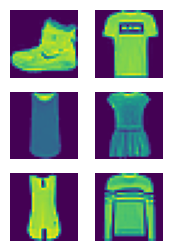

In [49]:
fig,axs = get_grid(8, nrows=3, imsize=1)
for ax,img in zip(axs.flat,imgs): show_image(img, ax)

In [50]:
#|export
@fc.delegates(subplots)
def show_images(ims:list, # Images to show
                nrows:int|None=None, # Number of rows in grid
                ncols:int|None=None, # Number of columns in grid (auto-calculated if None)
                titles:list|None=None, # Optional list of titles for each image
                **kwargs):
    "Show all images `ims` as subplots with `rows` using `titles`"
    axs = get_grid(len(ims), nrows, ncols, **kwargs)[1].flat
    for im,t,ax in zip_longest(ims, titles or [], axs): show_image(im, ax=ax, title=t)

In [51]:
yb = b['label']
lbls = yb[:8]

In [52]:
names = "Top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Boot".split()
titles = itemgetter(*lbls)(names)
' '.join(titles)

'Boot Top Top Dress Top Pullover Sneaker Pullover'

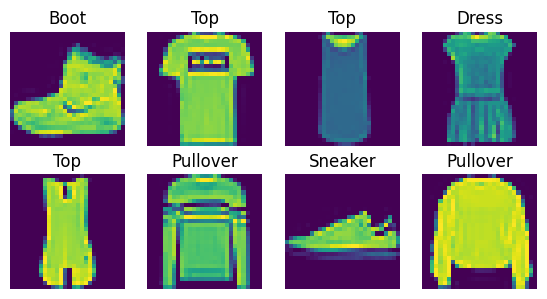

In [53]:
show_images(imgs, imsize=1.7, titles=titles)

In [54]:
#|export
class DataLoaders:
    def __init__(self, *dls): self.train,self.valid = dls[:2]

    @classmethod
    def from_dd(cls, dd, batch_size, as_tuple=True, **kwargs):
        f = collate_dict(dd['train'])
        return cls(*get_dls(*dd.values(), bs=batch_size, collate_fn=f))